Два бесконечно тонких связанных полуволновых линейных симметричных электрических вибратора (первичный излучатель – 1 и вторичный излучатель – 2) расположены в пространстве так, как показано на рис. 3.27. Расстояние между вибраторами $d=0,15λ$. К входным зажимам вторичного излучателя 2 подключена положительная реактивная нагрузка 60 Ом. Определить входное сопротивление первичного излучателя 1. Для излучающей системы рассчитать норми- рованную амплитудную характеристику направленности и построить её нормированную диаграмму направленности в плоскости XOY в полярной системе координат.

![](../img/Chapter_3_example_5_picture_1.png)

**Решение задачи**
Применим систему уравнений:
$U_{вх1}=Z_{11}I_{вх1}+Z_{12}I_{вх2}$,
$0=Z_{12}I_{вх1}+(Z_{22}+jX_н)I_{вх2}$ (1)
Поделив первое уравнение на $I_{вх1}$ , получим:
$Z_{вх1}=U_{вх1}/I_{вх1}=Z_{11}+Z_{12}I_{вх2}/I_{вх1}=Z_{11}+Z_{12нав}$ (2)

Определим значения величин, входящих в (2). Значение собственного сопротивления излучения $Z_{11}$ вычисляется,
если задать d = 0 и h = 0:
$Z_{11}=R_{11}+jX_{11}=(73,1+j42,5)$ Ом (3)
Теперь зададим $d = 0,15λ$ и $h = 0$, что позволяет получить:
$Z_{21}=Z_{12}=R_{12}+jX_{12}=R_{21}+jX_{21}=(60,4+j7,09)$ Ом (4)

Далее необходимо вычислить модуль и фазу отношения токов, входящее в (2):
$q=\sqrt{\frac{R^2_{12}+X^2_{12}}{R^2_{22}+(X_{22}+X_н)^2}}$,
$ψ=π+arctg(\frac{X_{12}}{R_{12}})-arctg(\frac{X_{22}+X_н}{R_{22}})$. (5)

Значение $X_{22} = X_{11} = 42,5$ Ом. По условиям задачи $X_н = 60$ Ом.

In [1]:
# Импортируем необходимые библиотеки
import numpy
import matplotlib.pyplot as plt

In [2]:
Z11 = 73.1 + 42.5j
Z21 = Z12 = 60.4 - 7.09j
X22 = X11 = 42.5
X12 = 7.09
XH = 60
R12 = 60.4
R22 = 73.1
q = 1
# Задаем угл PHI в градусах с параметрами:
# начальное значение - 0.01
# конечное значение - 360
# количество точек - 360
PHI = (numpy.pi/180)*numpy.linspace(0.01, 360, 360)

In [3]:
q = numpy.sqrt((R12**2+X12**2)/(R22**2+(X22+XH)**2))
print(q)
psi = numpy.pi + numpy.arctan(X12/R12) - numpy.arctan((X22+XH)/R22)
print(psi)

0.48305421368857593
2.3071564976800767


Таким образом:
$I_{вх2}/I_{вх1}=0,483e^{j2,307}$ (6)

Подставив в (2) найденные значения $Z_{11}$, $Z_{12}$, $I_{вх2}/I_{вх1}$, получим искомое значение входного сопротивления:

In [4]:
I2_I1 = q*numpy.e**(psi*1j)
Z1VH = Z11 + Z12*I2_I1
print(Z1VH)

(56.042745607216716+66.41749076963455j)


$f(φ)=\sqrt{1 + q^2 + 2qcos(ψ-0,3πsin(φ))}$ (7)

In [5]:
kd = 0.3*numpy.pi
# Функция get_unnormalized_hn рассчитывает ненормированную амплитудную характеристику направленности
def get_unnormalized_hn(phi):
    return numpy.array(numpy.sqrt(1+q**2+2*q*numpy.cos(psi - kd*numpy.sin(phi))))


# Функция get_max_hn рассчитывает максимвльное значение ненормированной амплитудной характеристики направленности
def get_max_hn(hn):
    return numpy.max(hn)


# Функция get_normalized_hn рассчитывает нормированную амплитудную характеристику направленности
def get_normalized_hn(hn, maxhn):
    return hn/maxhn

In [6]:
f = get_unnormalized_hn(PHI)
M = get_max_hn(f)
F = get_normalized_hn(f, M)

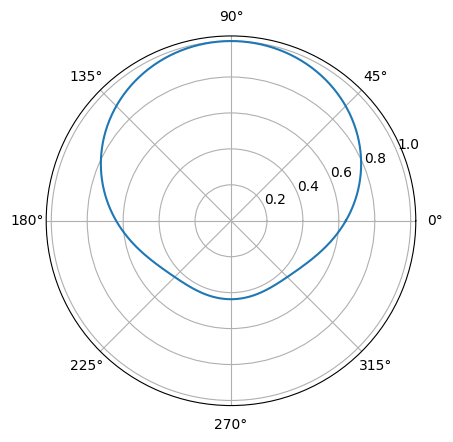

In [7]:
plt.polar(PHI, F)
plt.show()